In [1]:
from util.bpc_util import *

In [2]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

/Users/Kevin/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
plt.rcParams['figure.figsize'] = (7,5)

In [7]:
%load_ext autoreload

In [ ]:
%autoreload

# Synthetic Dataset 

We run the tests on the synthetic dataset, with the following settings:

* Normalized Laplacian (i.e. $\chi_k$ are now normalized by degree matrix $D$)
* ...

## Regime 1
$$\epsilon = \tau^2, \gamma = \tau^{\alpha}$$

This corresponds to ``little_oh = False``

In [ ]:
rand = False
Ns = [100,100,100]
fs = 5
density_= 0.8
normalized = True
little_oh = False
_save = False

norm_s = 'n'
if not normalized:
    norm_s = 'u'
param_str = 'rand_%d_Ns_%d_%d_%d_fs_%d_L_%s_lo_%d' % (int(rand), Ns[0], Ns[1], Ns[2], fs, norm_s, int(little_oh))
print(param_str)


# Get the overall setup, including ground truth u and separated graph W_0
Ns, u, B, labeled, draws, W_0 = syn_overall_setup(rand, Ns, fs, normalized, density_)


n = 20
T   = np.power(0.6, range(5, n+5))
ALPHAS = [0.5, 1, 1.5, 2, 2.5, 3.]
TRC, TRCBC, BIAS = syn_run_test(T, ALPHAS, Ns, B, labeled, u, W_0, little_oh=little_oh) 

syn_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
          val_str='TRC', save=_save, Jval=4, little_oh=little_oh)
syn_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
          val_str='TRCBC', save=_save, Jval=4, little_oh=little_oh)
syn_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|$', \
          val_str='BIAS', save=_save, Jval=6, little_oh=little_oh)


## Regime 2
$$\epsilon = \tau^3, \gamma = \tau^{\alpha}$$

This corresponds to ``little_oh = True``

In [ ]:
rand = False
Ns = [100,100,100]
fs = 5
density_= 0.8
normalized = True
little_oh = True
_save = False

norm_s = 'n'
if not normalized:
    norm_s = 'u'
param_str = 'rand_%d_Ns_%d_%d_%d_fs_%d_L_%s_lo_%d' % (int(rand), Ns[0], Ns[1], Ns[2], fs, norm_s, int(little_oh))
print(param_str)


# Get the overall setup, including ground truth u and separated graph W_0
Ns, u, B, labeled, draws, W_0 = syn_overall_setup(rand, Ns, fs, normalized, density_)


n = 20
T   = np.power(0.6, range(5, n+5))
ALPHAS = [0.5, 1, 1.5, 2, 2.5, 3.]
TRC, TRCBC, BIAS = syn_run_test(T, ALPHAS, Ns, B, labeled, u, W_0, little_oh=little_oh) 

syn_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
          val_str='TRC', save=_save, Jval=4, little_oh=little_oh)
syn_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
          val_str='TRCBC', save=_save, Jval=4, little_oh=little_oh)
syn_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|$', \
          val_str='BIAS', save=_save, Jval=6, little_oh=little_oh)


# Voting Records Code

In [10]:
%autoreload

In [14]:
sup_percent = 0.1
n = 10
T   = np.power(0.6, range(5, n+5))
ALPHAS = [0.5, 1, 1.5, 2, 2.5, 3.]

TRC, TRCBC, BIAS = voting_run_test([0.1*i for i in range(1, 10)], T, ALPHAS, rand=True, sup_percent=sup_percent, normalized=True)

Line fitting for TRC
The slope for alpha = 0.5 is : 0.9974
The slope for alpha = 1.0 is : 1.9997
The slope for alpha = 1.5 is : 2.9995
The slope for alpha = 2.0 is : 3.9992
The slope for alpha = 2.5 is : 4.9990
The slope for alpha = 3.0 is : 5.9987


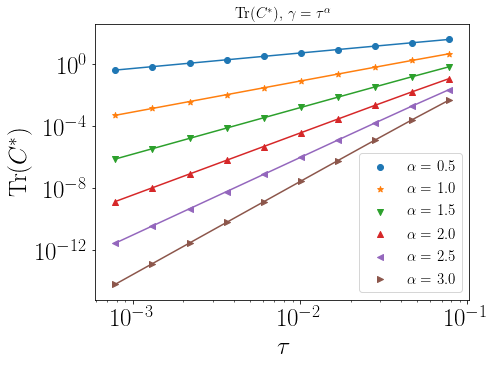

Line fitting for TRCBC
The slope for alpha = 0.5 is : 0.9576
The slope for alpha = 1.0 is : 1.9985
The slope for alpha = 1.5 is : 2.9982
The slope for alpha = 2.0 is : 3.9977
The slope for alpha = 2.5 is : 4.9971
The slope for alpha = 3.0 is : 5.9967


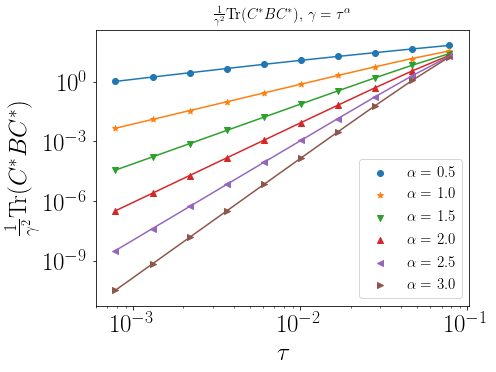

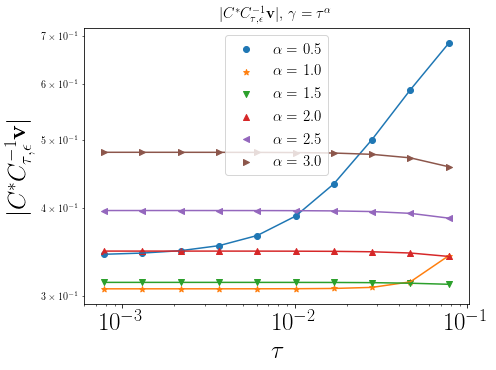

In [15]:
_save = False
little_oh= False
param_str = 'VotingRecords'

voting_plot_data(T, TRC, ALPHAS, param_str, title_= r'$\mathrm{Tr}(C^*)$', \
          val_str='TRC', save=_save, Jval=4)
voting_plot_data(T, TRCBC, ALPHAS, param_str, title_= r'$\frac{1}{\gamma^2}\mathrm{Tr}(C^*BC^*)$', \
          val_str='TRCBC', save=_save, Jval=4)
voting_plot_data(T, BIAS, ALPHAS, param_str, title_= r'$|C^*C_{\tau, \epsilon}^{-1}\mathbf{v}|$', \
          val_str='BIAS', save=_save, Jval=-1)